In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model with simple kernel(3X3)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0194 - acc: 0.9935 - val_loss: 0.0299 - val_acc: 0.9922
Epoch 2/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0158 - acc: 0.9948 - val_loss: 0.0277 - val_acc: 0.9932
Epoch 3/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0358 - val_acc: 0.9918
Epoch 4/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0149 - acc: 0.9949 - val_loss: 0.0312 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0321 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0130 - acc: 0.9953 - val_loss: 0.0301 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0126 - acc: 0.9955 - val_loss: 0.0338 - 

Test score: 0.03223356446304301
Test accuracy: 0.9932


<IPython.core.display.Javascript object>


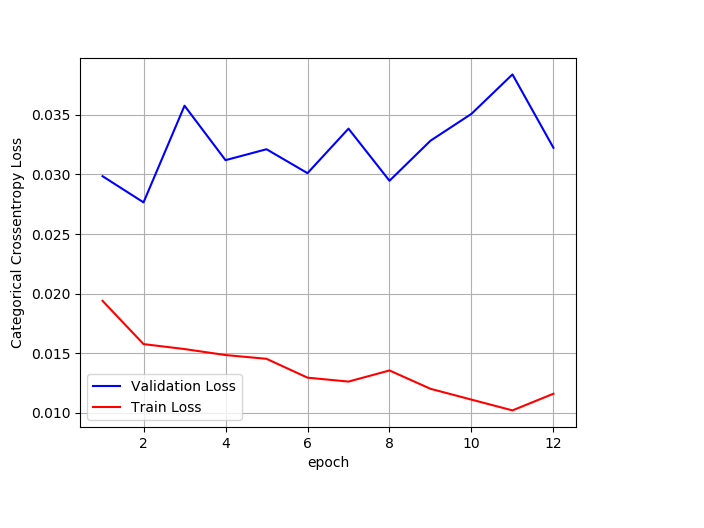

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model with kernel (5X5)

In [20]:
#Now trying with different architecture
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [21]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
%%time
history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2883 - acc: 0.9090 - val_loss: 0.0470 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0903 - acc: 0.9751 - val_loss: 0.0343 - val_acc: 0.9896
Epoch 3/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0687 - acc: 0.9809 - val_loss: 0.0290 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0559 - acc: 0.9844 - val_loss: 0.0308 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0490 - acc: 0.9858 - val_loss: 0.0254 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0420 - acc: 0.9879 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0365 - acc: 0.9893 - val_loss: 0.0258 - 

Test score: 0.02780324183998391
Test accuracy: 0.9926


<IPython.core.display.Javascript object>


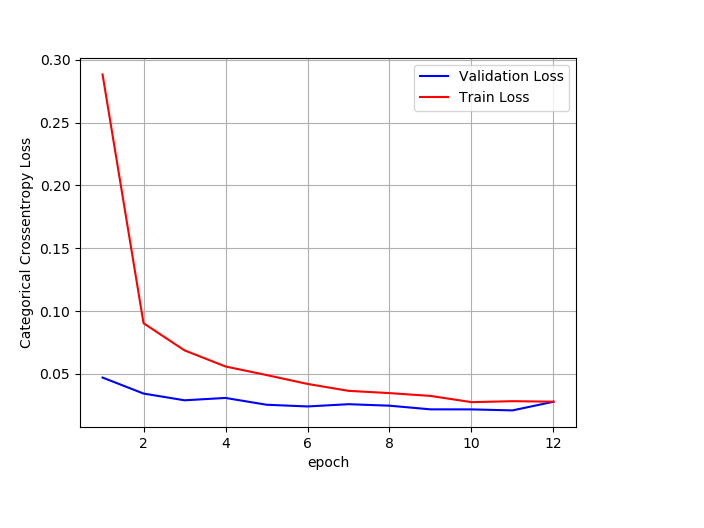

In [23]:
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model with Kernel (7 X 7)

In [24]:
#Now trying with different architecture
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(64, (7, 7), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation='softmax'))

In [25]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
%%time
history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.2671 - acc: 0.9158 - val_loss: 0.0516 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0873 - acc: 0.9752 - val_loss: 0.0372 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0640 - acc: 0.9822 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0235 - val_acc: 0.9931
Epoch 5/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0455 - acc: 0.9868 - val_loss: 0.0231 - val_acc: 0.9928
Epoch 6/12
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0399 - acc: 0.9885 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0359 - acc: 0.9893 - val_loss: 0.0292 - 

Test score: 0.026395327147580156
Test accuracy: 0.9924


<IPython.core.display.Javascript object>


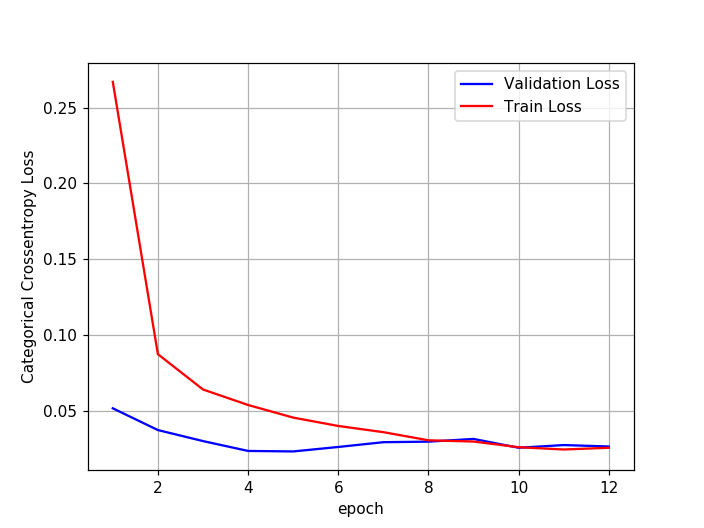

In [28]:
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model', 'Kernel Size','Accuracy']

x.add_row(['Model 1','3 X 3',99.32])
x.add_row(['Model 2','5 X 5',99.26])
x.add_row(['Model 3','7 X 7',99.24])
print(x)

As the number of kernels are increasing we can see that accuracy is also increasing. 

If we observe the difference between all the three models we can easily say as the kernel size increases our model less underfit because in the 1st model is an example of super underfit.

We can conclude it in:
<h> 3X3 : Underfit
<h>    5X5 : Less Underfit
<h>    7X7 : Good Model